# ufc 선수 경기 기록을 통한 승자 예측

# 1

In [353]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

ufcdata_df = pd.read_csv('./ufc/testdata.csv').iloc[:,1:]
ufcdata_df.head(3)

,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9,Y10,...,Y105,Y106,Y107,Y108,Y109,Y110,Y111,Y112,Y113,Y
0,Red,Bantamweight,5,0,4,0,9.200000,6.000000,0.200000,0.000000,...,0.33600,0.000000,0.900000,0.100000,0.050000,110.500000,43.300,27,742.60,1
1,Red,Lightweight,3,0,3,0,15.354839,11.322581,6.741935,4.387097,...,0.34000,0.066667,2.866667,0.666667,0.131333,102.133333,38.600,33,604.40,1
2,Blue,Bantamweight,3,0,4,0,17.000000,14.000000,13.750000,11.000000,...,0.44625,0.000000,2.375000,0.000000,0.000000,115.125000,48.875,20,690.25,0


In [344]:
from sklearn.model_selection import train_test_split
def get_train_test_dataset(df=None):
    df_copy = df.copy()
    X_features = df_copy.iloc[:, 2:-1]
    y_target = df_copy.iloc[:, -1]
    X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(ufcdata_df)

In [181]:
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0] * 100)
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0] * 100)

학습 데이터 레이블 값 비율
1    66.793089
0    33.206911
Name: Y, dtype: float64
테스트 데이터 레이블 값 비율
1    66.764995
0    33.235005
Name: Y, dtype: float64


In [355]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [184]:
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:, 1]
    get_clf_eval(tgt_test, pred, pred_proba)
    

In [356]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

오차 행렬
[[ 75 263]
 [ 69 610]]
정확도: 0.6735, 정밀도: 0.6987, 재현율: 0.8984, F1: 0.7861, AUC:0.6450


In [357]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)


오차 행렬
[[ 72 266]
 [ 86 593]]
정확도: 0.6539, 정밀도: 0.6903, 재현율: 0.8733, F1: 0.7711, AUC:0.6553


In [358]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=0)
get_model_train_eval(rf_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

오차 행렬
[[ 57 281]
 [ 44 635]]
정확도: 0.6804, 정밀도: 0.6932, 재현율: 0.9352, F1: 0.7962, AUC:0.6812


# 2 Label Encoding

In [304]:
onehot = pd.get_dummies(ufcdata_df.loc[:,"Y2"])
ufcdata_df2 =  pd.concat([ufcdata_df,onehot],axis=1)

In [305]:
onehot

,Bantamweight,Catch Weight,Featherweight,Flyweight,Heavyweight,Light Heavyweight,Lightweight,Middleweight,Open Weight,Welterweight
0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
3385,0,0,0,0,0,0,0,0,1,0
3386,0,0,0,0,0,0,0,0,1,0
3387,0,1,0,0,0,0,0,0,0,0
3388,0,0,0,0,0,0,0,0,1,0


In [359]:
ufcdata_df2.head()

,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9,Y10,...,Bantamweight,Catch Weight,Featherweight,Flyweight,Heavyweight,Light Heavyweight,Lightweight,Middleweight,Open Weight,Welterweight
0,Red,Bantamweight,5,0,4,0,9.200000,6.000000,0.200000,0.000000,...,1,0,0,0,0,0,0,0,0,0
1,Red,Lightweight,3,0,3,0,15.354839,11.322581,6.741935,4.387097,...,0,0,0,0,0,0,1,0,0,0
2,Blue,Bantamweight,3,0,4,0,17.000000,14.000000,13.750000,11.000000,...,1,0,0,0,0,0,0,0,0,0
3,Blue,Heavyweight,3,0,1,0,17.000000,14.500000,2.500000,2.000000,...,0,0,0,0,1,0,0,0,0,0
4,Red,Bantamweight,3,0,3,0,15.000000,7.416667,6.083333,3.416667,...,1,0,0,0,0,0,0,0,0,0


In [360]:
from sklearn.model_selection import train_test_split
def get_train_test_dataset(df=None):
    df_copy = df.copy()
    X_features = df_copy.iloc[:, 2:-11]
    X_features = pd.concat([X_features, df_copy.iloc[:,-10:]], axis=1)
    y_target = df_copy.iloc[:, -11]
    X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(ufcdata_df2)

In [361]:
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

오차 행렬
[[ 80 258]
 [ 78 601]]
정확도: 0.6696, 정밀도: 0.6997, 재현율: 0.8851, F1: 0.7815, AUC:0.6441


In [362]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)


오차 행렬
[[ 82 256]
 [ 87 592]]
정확도: 0.6627, 정밀도: 0.6981, 재현율: 0.8719, F1: 0.7754, AUC:0.6655


In [363]:
rf_clf = RandomForestClassifier(random_state=0)
get_model_train_eval(rf_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

오차 행렬
[[ 57 281]
 [ 43 636]]
정확도: 0.6814, 정밀도: 0.6936, 재현율: 0.9367, F1: 0.7970, AUC:0.6837


# 3 StandardScaler

In [364]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
def get_train_test_dataset(df=None):
    df_copy = df.copy()
    X_features = df_copy.iloc[:, 2:-1]
    scaler = StandardScaler()
    scaler.fit(X_features)
    X_features_scaled = scaler.transform(X_features)
    y_target = df_copy.iloc[:, -1]
    X_train, X_test, y_train, y_test = train_test_split(X_features_scaled, y_target, test_size=0.3, random_state=0, stratify=y_target)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(ufcdata_df)

In [365]:
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

오차 행렬
[[ 81 257]
 [ 79 600]]
정확도: 0.6696, 정밀도: 0.7001, 재현율: 0.8837, F1: 0.7812, AUC:0.6782


In [366]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)


오차 행렬
[[ 75 263]
 [ 81 598]]
정확도: 0.6618, 정밀도: 0.6945, 재현율: 0.8807, F1: 0.7766, AUC:0.6674


In [367]:
rf_clf = RandomForestClassifier(random_state=0)
get_model_train_eval(rf_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

오차 행렬
[[ 58 280]
 [ 44 635]]
정확도: 0.6814, 정밀도: 0.6940, 재현율: 0.9352, F1: 0.7967, AUC:0.6814


# 4 SMOTE

In [368]:
from sklearn.model_selection import train_test_split
def get_train_test_dataset(df=None):
    df_copy = df.copy()
    X_features = df_copy.iloc[:, 2:-1]
    scaler = StandardScaler()
    scaler.fit(X_features)
    X_features_scaled = scaler.transform(X_features)
    y_target = df_copy.iloc[:, -1]
    X_train, X_test, y_train, y_test = train_test_split(X_features_scaled, y_target, test_size=0.3, random_state=0, stratify=y_target)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(ufcdata_df)

In [239]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_sample(X_train,y_train)

In [240]:
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)

오차 행렬
[[203 135]
 [244 435]]
정확도: 0.6273, 정밀도: 0.7632, 재현율: 0.6406, F1: 0.6966, AUC:0.6676


In [241]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)

오차 행렬
[[106 232]
 [114 565]]
정확도: 0.6598, 정밀도: 0.7089, 재현율: 0.8321, F1: 0.7656, AUC:0.6675


In [242]:
rf_clf = RandomForestClassifier(random_state=0)
get_model_train_eval(rf_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)

오차 행렬
[[145 193]
 [147 532]]
정확도: 0.6657, 정밀도: 0.7338, 재현율: 0.7835, F1: 0.7578, AUC:0.6777


# 4-2 Label Encoding + StandardScaler

In [244]:
from sklearn.model_selection import train_test_split
def get_train_test_dataset(df=None):
    df_copy = df.copy()
    X_features = df_copy.iloc[:, 2:-11]
    scaler = StandardScaler()
    scaler.fit(X_features)
    X_features_scaled = scaler.transform(X_features)
    X_features_scaled = pd.concat([X_features, df_copy.iloc[:,-10:]], axis=1)
    y_target = df_copy.iloc[:, -11]
    X_train, X_test, y_train, y_test = train_test_split(X_features_scaled, y_target, test_size=0.3, random_state=0, stratify=y_target)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(ufcdata_df2)

In [246]:
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

오차 행렬
[[ 80 258]
 [ 78 601]]
정확도: 0.6696, 정밀도: 0.6997, 재현율: 0.8851, F1: 0.7815, AUC:0.6441


In [247]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

오차 행렬
[[ 82 256]
 [ 87 592]]
정확도: 0.6627, 정밀도: 0.6981, 재현율: 0.8719, F1: 0.7754, AUC:0.6655


In [248]:
rf_clf = RandomForestClassifier(random_state=0)
get_model_train_eval(rf_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

오차 행렬
[[ 57 281]
 [ 43 636]]
정확도: 0.6814, 정밀도: 0.6936, 재현율: 0.9367, F1: 0.7970, AUC:0.6837


# 5 Stacking

In [282]:
def get_train_test_dataset(df=None):
    df_copy = df.copy()
    X_features = df_copy.iloc[:, 2:-1]
    y_target = df_copy.iloc[:, -1]
    X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(ufcdata_df)

In [283]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
# 개별 ML 모델을 위한 Classifier 생성.
knn_clf  = KNeighborsClassifier(n_neighbors=4)
lr_clf = LogisticRegression(C=10)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators=100)
rf_final = RandomForestClassifier(n_estimators=100, random_state=0)


In [284]:
knn_clf.fit(X_train, y_train)
lr_clf.fit(X_train , y_train)
dt_clf.fit(X_train , y_train)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [285]:
knn_pred = knn_clf.predict(X_test)
lr_pred = lr_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
ada_pred = ada_clf.predict(X_test)

print('KNN 정확도: {0:.4f}'.format(accuracy_score(y_test, knn_pred)))
print('로지스틱 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))
print('결정 트리 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('에이다부스트 정확도: {0:.4f} :'.format(accuracy_score(y_test, ada_pred)))

KNN 정확도: 0.5693
로지스틱 정확도: 0.6696
결정 트리 정확도: 0.5978
에이다부스트 정확도: 0.6500 :


In [286]:
pred = np.array([knn_pred, lr_pred, dt_pred, ada_pred])
print(pred.shape)

pred = np.transpose(pred)
print(pred.shape)

(4, 1017)
(1017, 4)


In [287]:
rf_final.fit(pred, y_test)
final = rf_final.predict(pred)

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test , final)))

최종 메타 모델의 예측 정확도: 0.6853


# 6 GridSearchCV

In [312]:
from sklearn.model_selection import train_test_split
def get_train_test_dataset(df=None):
    df_copy = df.copy()
    X_features = df_copy.iloc[:, 2:-11]
    scaler = StandardScaler()
    scaler.fit(X_features)
    X_features_scaled = scaler.transform(X_features)
    X_features_scaled = pd.concat([X_features, df_copy.iloc[:,-10:]], axis=1)
    y_target = df_copy.iloc[:, -11]
    X_train, X_test, y_train, y_test = train_test_split(X_features_scaled, y_target, test_size=0.3, random_state=0, stratify=y_target)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(ufcdata_df2)

In [313]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100,300],
    'max_depth' : [6, 8, 10, 12], 
    'min_samples_leaf' : [8, 12, 18 ],
    'min_samples_split' : [4, 8, 16, 20]
}
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=5, n_jobs=-1 )
grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 8, 'min_samples_leaf': 18, 'min_samples_split': 4, 'n_estimators': 100}
최고 예측 정확도: 0.6785


In [319]:
best = grid_cv.best_estimator_
rf_pred = best.predict(X_test)
rf_accuracy = accuracy_score(y_test, gb_pred)
print('RF 정확도: {0:.4f}'.format(rf_accuracy))

RF 정확도: 0.6804


In [323]:
rf_clf = RandomForestClassifier(random_state=0,\
    n_estimators =100, max_depth=8, min_samples_leaf=18, min_samples_split=4)
get_model_train_eval(rf_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

오차 행렬
[[ 29 309]
 [ 16 663]]
정확도: 0.6804, 정밀도: 0.6821, 재현율: 0.9764, F1: 0.8031, AUC:0.6779


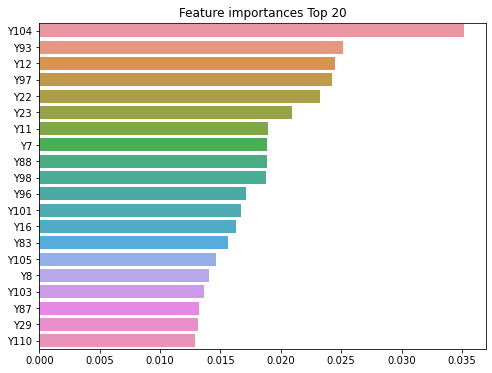

In [320]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = best.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

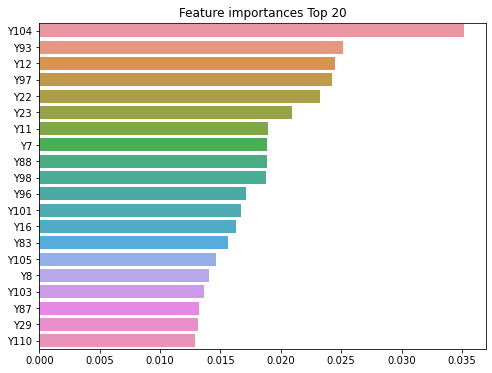

In [324]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

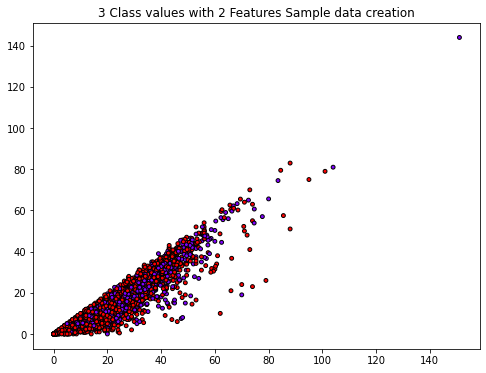

In [333]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline


plt.figure(figsize=(8,6))
plt.title("3 Class values with 2 Features Sample data creation")

plt.scatter(X_train.loc[:,'Y104'], X_train.loc[:,'Y93'], marker='o', c=y_train, s=15, cmap='rainbow', edgecolor='k')